<a href="https://colab.research.google.com/github/Vimal9900/College-Work/blob/main/ML_Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective : Predicting Auto MPG Using Linear Regression and Naive Bayes

### Import dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/auto-mpg.csv')

### EDA

In [ ]:
df=df.sample(frac=1)

In [ ]:
#Checking missing value
df.isna().any()

,0
mpg,False
cylinders,False
displacement,False
horsepower,False
weight,False
acceleration,False
model year,False
origin,False
car name,False


There is no missing value in whole dataset.

Extracting required features and respective Label

In [ ]:
x=df[['displacement','horsepower', 'weight', 'acceleration','origin']]
y=df['mpg']
y.column=['mpg']
print(x.shape,y.shape)
print(x.info())

(398, 5) (398,)
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 189 to 191
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.7+ KB
None


In [ ]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 189 to 191
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    object 
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 18.7+ KB
None


Here horsepower is not a numeric number hence converting to numeric

In [ ]:
# Replace '?' with NaN (Not a Number)
x['horsepower'] = x['horsepower'].replace('?', np.nan)

# Convert the column to numeric, handling errors
x['horsepower'] = pd.to_numeric(x['horsepower'])

#imputed Null value with mean of feature horsepower
x['horsepower'].fillna(x['horsepower'].mean(), inplace=True)

x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 189 to 191
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   horsepower    398 non-null    float64
 2   weight        398 non-null    int64  
 3   acceleration  398 non-null    float64
 4   origin        398 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 18.7 KB


<ipython-input-271-943e503c4f06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'] = x['horsepower'].replace('?', np.nan)
<ipython-input-271-943e503c4f06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['horsepower'] = pd.to_numeric(x['horsepower'])
<ipython-input-271-943e503c4f06>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

Splitting the dataset for Training and Testing

In [ ]:
# Split percent

splitter=int(.7*len(x))

#splitting data set for training and testing
x_=x[['displacement','horsepower', 'weight', 'acceleration']]
y_=y.copy()
x_train=x_[:splitter]
y_train=y_[:splitter]
x_test=x_[splitter:]
y_test=y_[splitter:]

print(x.shape,y.shape)
print(x_test.shape,y_test.shape,x_train.shape,y_train.shape)

(398, 5) (398,)
(120, 4) (120,) (278, 4) (278,)


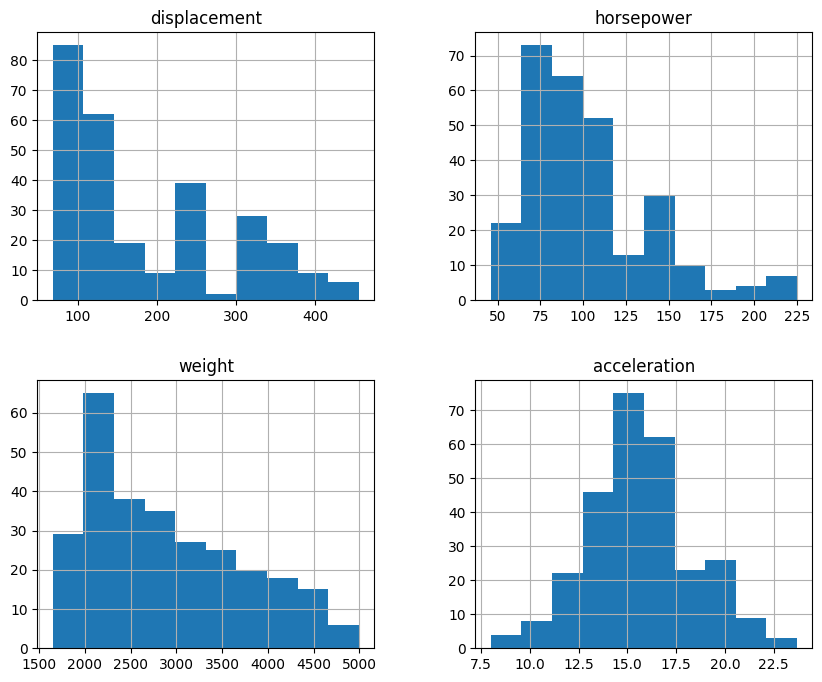

In [ ]:
x_train.hist(figsize=(10, 8))
plt.show()


## Linear Regression

### Using Least square method

In [ ]:
class LinearRegression:
    def __init__(self):
        self.coefficients = None

    def least_square(self, A, y):
        # Added 1 as a last column
        A = np.c_[A, np.ones((len(A), 1))]
        # Converting to numpy array
        A = np.array(A)
        y = np.array(y)

        # Compute A^T * A and A^T * y
        AtA = np.dot(A.T, A)
        Aty = np.dot(A.T, y)

        # Solve for p = (AtA)^(-1) * Aty
        self.coefficients = np.dot(np.linalg.inv(AtA), Aty)

        return self.coefficients

    def predict(self, x,coefficients):
        x = np.c_[x, np.ones((len(x), 1))]
        y_pred = np.dot(x, coefficients)
        return y_pred

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def r2_score(self, y_true, y_pred):
        ss_res = np.sum((y_true - y_pred) ** 2)
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2

    def gradient_descent(self, x, y, learning_rate=0.00001, num_iterations=1):
        x = np.c_[x, np.ones((len(x), 1))]
        # Initialize the coefficients
        self.coefficients = np.zeros(x.shape[1])

        # Perform gradient descent
        for _ in range(num_iterations):
            y_pred = np.dot(x, self.coefficients)
            error = y_pred - y
            gradient = np.dot(x.T, error) / len(x)
            self.coefficients -= learning_rate * gradient

        return self.coefficients

# Create an instance of the LinearRegression class
model = LinearRegression()

# Fit the model using least squares
coefficients = model.least_square(x_train, y_train)
print("Coefficients (Least Squares): ", coefficients)

# Predict using the fitted model
y_pred = model.predict(x_test,coefficients)

# Calculate MSE
mse = model.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate R-squared
r2 = model.r2_score(y_test, y_pred)
print("R-squared: ", r2)

# Fit the model using gradient descent
gradient_descent_coefficients = model.gradient_descent(x_train, y_train)
print("Coefficients (Gradient Descent): ", gradient_descent_coefficients)
# Predict using the fitted model
y_pred = model.predict(x_test,gradient_descent_coefficients )

# Calculate MSE
mse = model.mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

# Calculate R-squared
r2 = model.r2_score(y_test, y_pred)
print("R-squared: ", r2)


Coefficients (Least Squares):  [-1.49451038e-02 -3.90349156e-02 -4.82879250e-03 -1.00562314e-01
  4.63607402e+01]
Mean Squared Error:  18.657430964388606
R-squared:  0.6628640169787875
Coefficients (Gradient Descent):  [3.81484245e-02 2.21804469e-02 6.41616453e-01 3.83923417e-03
 2.40197842e-04]
Mean Squared Error:  4292090.79740142
R-squared:  -77556.2077935139


## Naive Bayes Implementation

### categorize columns into low, medium, high

Text(0.5, 1.0, 'Origin')

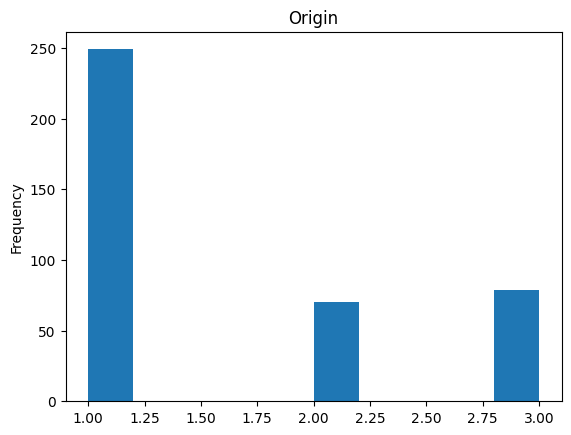

In [ ]:
x.origin.plot.hist().set_title('Origin')

In [ ]:
# Analyze the data and categorize columns into low, medium, high
def categorize_column(df, column_name):

  values = df[column_name]

  # Calculate quartiles
  q1 = values.quantile(0.25)
  q2 = values.quantile(0.5)  # Median
  q3 = values.quantile(0.75)

  categories = {}
  categories['low'] = f"<= {q1:.2f}"
  categories['medium'] = f"{q1:.2f} - {q3:.2f}"
  categories['high'] = f">= {q3:.2f}"

  return categories

# Apply the function to each feature column
for col in x.columns:
  print(f"Column: {col}")
  categories = categorize_column(x, col)
  print(categories)
  print("\n")

for col in y.column:
  print(f"Column: {col}")
  categories = categorize_column(pd.DataFrame(y), col)
  print(categories)
  print("\n")

Column: displacement
{'low': '<= 104.25', 'medium': '104.25 - 262.00', 'high': '>= 262.00'}


Column: horsepower
{'low': '<= 76.00', 'medium': '76.00 - 125.00', 'high': '>= 125.00'}


Column: weight
{'low': '<= 2223.75', 'medium': '2223.75 - 3608.00', 'high': '>= 3608.00'}


Column: acceleration
{'low': '<= 13.83', 'medium': '13.83 - 17.18', 'high': '>= 17.18'}


Column: origin
{'low': '<= 1.00', 'medium': '1.00 - 2.00', 'high': '>= 2.00'}


Column: mpg
{'low': '<= 17.50', 'medium': '17.50 - 29.00', 'high': '>= 29.00'}




Column: displacement
{'low': '<= 104.25', 'medium': '104.25 - 262.00', 'high': '>= 262.00'}


Column: horsepower
{'low': '<= 76.00', 'medium': '76.00 - 125.00', 'high': '>= 125.00'}


Column: weight
{'low': '<= 2223.75', 'medium': '2223.75 - 3608.00', 'high': '>= 3608.00'}


Column: acceleration
{'low': '<= 13.83', 'medium': '13.83 - 17.18', 'high': '>= 17.18'}

In [ ]:
# Fetching required features and making a copy of the dataset
x_bayes = x[['displacement','horsepower', 'weight', 'origin']]
y_bayes = y.copy()

#Label category
y_bayes = pd.cut(x=y_bayes, bins=[0,20,30,y_bayes.max()], labels=['low','medium','high'])

#Feature category
x_bayes['displacement'] = pd.cut(x=x['displacement'], bins=[0,100,262,x_bayes['displacement'].max()], labels=['small','medium','large']) # Create a new column for categorized displacement
x_bayes['horsepower'] = pd.cut(x=x['horsepower'], bins=[0,76,125,x_bayes['horsepower'].max()], labels=['low','medium','high']) # Create a new column for categorized horsepower
x_bayes['weight'] = pd.cut(x=x['weight'], bins=[0,2223,3608,x_bayes['weight'].max()], labels=['light','medium','heavy']) # Create a new column for categorized weight
x_bayes['origin'] = pd.cut(x=x['origin'], bins=[0,1,2,x_bayes['origin'].max()], labels=['USA','RUSSIA','INDIA']) # Create a new column for categorized origin
# x_bayes['acceleration'] = pd.cut(x=x['acceleration'], bins=[0,13,17,x_bayes['acceleration'].max()], labels=['slow','medium','fast']) # Create a new column for categorized acceleration

# label 0 indicates low,label 1 indicates medium,label 2 indicates high accordingly in features
# x_bayes['displacement'] = pd.cut(x=x['displacement'], bins=[0,100,262,x_bayes['displacement'].max()], labels=[0,1,2]) # Create a new column for categorized displacement
# x_bayes['horsepower'] = pd.cut(x=x['horsepower'], bins=[0,76,125,x_bayes['horsepower'].max()], labels=[0,1,2]) # Create a new column for categorized horsepower
# x_bayes['weight'] = pd.cut(x=x['weight'], bins=[0,2223,3608,x_bayes['weight'].max()], labels=[0,1,2]) # Create a new column for categorized weight
# x_bayes['acceleration'] = pd.cut(x=x['acceleration'], bins=[0,13,17,x_bayes['acceleration'].max()], labels=[0,1,2]) # Create a new column for categorized acceleration

<ipython-input-277-d117bb41d824>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_bayes['displacement'] = pd.cut(x=x['displacement'], bins=[0,100,262,x_bayes['displacement'].max()], labels=['small','medium','large']) # Create a new column for categorized displacement
<ipython-input-277-d117bb41d824>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_bayes['horsepower'] = pd.cut(x=x['horsepower'], bins=[0,76,125,x_bayes['horsepower'].max()], labels=['low','medium','high']) # Create a new column for categ

In [ ]:
# splitting data set for training and testing
# Split percent
splitter=int(.7*len(x))

x_train_bayes=x_bayes[:splitter]
y_train_bayes=y_bayes[:splitter]
x_test_bayes=x_bayes[splitter:]
y_test_bayes=y_bayes[splitter:]

print(x_train_bayes.shape,y_train_bayes.shape)
print(x_test_bayes.shape,y_test_bayes.shape)

(278, 4) (278,)
(120, 4) (120,)


In [ ]:
class NaiveBayesClassifier:
    def __init__(self):
        self.class_probs = {}
        self.feature_probs = {}
        self.feature_classes = {}

    def calculate_prior(self,y,label='mpg'):
        classes = y[label].unique()
        prior = {}
        for cls in classes:
            prior[cls] = len(y[y[label]==cls]) / len(y)
        return prior

    def fit(self, X, y):
        # Calculate prior probabilities for each class
        self.classes = y.unique()
        self.class_probs = self.calculate_prior(y.to_frame(), 'mpg')

        # Initialize dictionaries to hold feature probabilities for each class
        self.feature_probs = {cls: {col: {} for col in X.columns} for cls in self.classes}
        self.feature_classes = {col: X[col].unique() for col in X.columns}

        # Calculate probabilities for each feature given each class
        for cls in self.classes:
            X_cls = X[y == cls]  # Filter rows where y == cls
            for col in X.columns:
                col_values = self.feature_classes[col]
                feature_counts = X_cls[col].value_counts()
                total = len(X_cls)  # Total count of examples for this class

                # Calculate conditional probabilities
                self.feature_probs[cls][col] = {val: feature_counts.get(val, 0) / total for val in col_values}

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for cls in self.classes:
                prob = self.class_probs[cls]
                for col in X.columns:
                    prob *= self.feature_probs[cls][col].get(row[col], 0)
                probs[cls] = prob

            # Choose the class with the highest probability
            predictions.append(max(probs, key=probs.get))

        return np.array(predictions)

    def accuracy(self,y_true,y_pred):
        print("Accuracy: ",np.sum(y_true==y_pred)/len(y_true))
        # return np.sum(y_true==y_pred)/len(y_true)


In [ ]:

NB =NaiveBayesClassifier()
NB.fit(x_train_bayes,y_train_bayes)

In [ ]:
x_pred = NB.predict(x_train_bayes)
NB.accuracy(y_train_bayes,x_pred)

Accuracy:  0.7086330935251799


In [ ]:
y_pred = NB.predict(x_test_bayes)

In [ ]:
NB.accuracy(y_test_bayes,y_pred)

Accuracy:  0.7333333333333333


## Hybrid Model - Combining Naive Bayes and Linear Regression

In [ ]:
class HybridModel:
    def __init__(self):
        self.nb_classifier = NaiveBayesClassifier()
        self.lr_model = LinearRegression()
        self.mapping = {'low': 10, 'medium': 25, 'high': 35}

    def fit(self, x_train_bayes, y_train_bayes, x_train, y_train):
        # Fit Naive Bayes
        self.nb_classifier.fit(x_train_bayes, y_train_bayes)

        # Predict using Naive Bayes
        nb_predictions_train = self.nb_classifier.predict(x_train_bayes)
        nb_predictions_train = pd.Series(nb_predictions_train)
        nb_predictions_train = nb_predictions_train.map(self.mapping)

        # Combine Naive Bayes predictions with original Linear Regression features
        X_train_combined = pd.DataFrame(np.c_[x_train, nb_predictions_train])

        # Fit Linear Regression
        self.lr_model.least_square(X_train_combined, y_train)

    def predict(self, x_test_bayes, x_test):
        # Predict using Naive Bayes
        nb_predictions_test = self.nb_classifier.predict(x_test_bayes)
        nb_predictions_test = pd.Series(nb_predictions_test)
        nb_predictions_test = nb_predictions_test.map(self.mapping)

        # Combine Naive Bayes predictions with original Linear Regression features
        X_test_combined = pd.DataFrame(np.c_[x_test, nb_predictions_test])

        # Predict using Linear Regression
        y_pred = self.lr_model.predict(X_test_combined, self.lr_model.coefficients)
        return y_pred

    def evaluate(self, y_true, y_pred):
        # Calculate MSE
        mse = self.lr_model.mean_squared_error(y_true, y_pred)
        print("Mean Squared Error: ", mse)

        # Calculate R-squared
        r2 = self.lr_model.r2_score(y_true, y_pred)
        print("R-squared: ", r2)




Mean Squared Error:  18.473099433522552
R-squared:  0.6661948502526154


In [ ]:
# Create an instance of the HybridModel class
hybrid_model = HybridModel()

# Fit the model
hybrid_model.fit(x_train_bayes, y_train_bayes, x_train, y_train)

# Predict using the fitted model
y_pred = hybrid_model.predict(x_test_bayes, x_test)

# Evaluate the model
hybrid_model.evaluate(y_test, y_pred)